In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

def plot_stripes(df, x_col, y_col, x_col_lbl, y_col_lbl,title="Stripes Plot"):
    """
    Plots a stripes chart for the given DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        x_col (str): The column to be used for the x-axis (categorical).
        y_col (str): The column to be used for the y-axis (numerical).
        title (str): The title of the plot.
    """

    plt.figure(figsize=(12, 6))
    sns.stripplot(x=x_col, y=y_col, data=df, jitter=True, alpha=0.7)
    plt.title(title)
    plt.xlabel(x_col_lbl)
    plt.ylabel(y_col_lbl)
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()

def plot_groups(df, group1, group2, group3, title="Group Plot"):
    """
    Plots a stripes chart for the given DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        x_col (str): The column to be used for the x-axis (categorical).
        y_col (str): The column to be used for the y-axis (numerical).
        title (str): The title of the plot.
    """

    df_grouped = df.groupby([group1, group2, group3]).size().reset_index(name="count")

    # Create Sunburst Chart
    fig = px.sunburst(
    df_grouped,
    path=[group1, group2, group3],  # Hierarchical levels
    values="count",
    title=title,
    color="count",
    color_continuous_scale="Blues"
    )

    # Show Chart
    fig.show()

def plot_hist(df, plotFld,xlabel,ylabel,title="Hist Plot"):
    """
    Plots a stripes chart for the given DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        x_col (str): The column to be used for the x-axis (categorical).
        y_col (str): The column to be used for the y-axis (numerical).
        title (str): The title of the plot.
    """

    # Set style
    sns.set(style="whitegrid")

    # Plot histogram of total streams
    plt.figure(figsize=(12, 6))
    sns.histplot(df[plotFld], bins=25, kde=True, color='mediumseagreen')

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

from google.colab import drive
drive.mount('/content/gdrive')

#encodings = ['utf-8', 'ISO-8859-1', 'cp1252']

df = pd.read_csv("/content/gdrive/My Drive/Provisional_drug_overdose_death_counts_for_specific_drugs.csv")

# Quick preview
print(df.head())
print(df.info())


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
   data_as_of  death_year  death_month jurisdiction_occurrence  \
0  01/05/2025        2019            1           United States   
1  01/05/2025        2019            1           United States   
2  01/05/2025        2019            1           United States   
3  01/05/2025        2019            1           United States   
4  01/05/2025        2019            1           United States   

     drug_involved      time_period month_ending_date  drug_overdose_deaths  \
0          Cocaine  12 month-ending        01/31/2019               15613.0   
1         Fentanyl  12 month-ending        01/31/2019               30367.0   
2       Gabapentin  12 month-ending        01/31/2019                1935.0   
3           Heroin  12 month-ending        01/31/2019               15475.0   
4  Methamphetamine  12 month-ending        01/31/2019               12059.0  

In [ ]:
plot_groups(df, "jurisdiction_occurrence", "time_period","drug_involved", "drug_overdose_deaths by drug_involved")

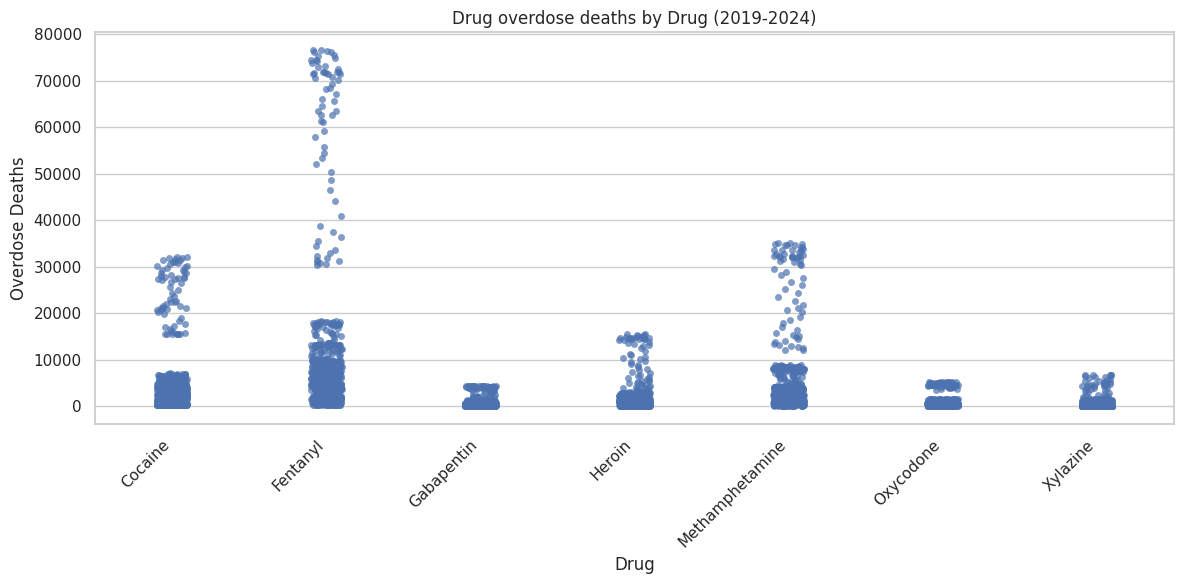

In [ ]:
plot_stripes(df, "drug_involved", "drug_overdose_deaths","Drug", "Overdose Deaths", "Drug overdose deaths by Drug (2019-2024)")